# First-Price and Second-Price Auctions

This lecture is designed to set the stage for a subsequent lecture about [Multiple Good Allocation Mechanisms](https://python.quantecon.org/house_auction.html)

In that lecture, a planner or auctioneer simultaneously allocates several goods to set of people.

In the present lecture, a single good is allocated to one person within a set of people.


Here  we'll learn about and simulate two classic auctions :

* a First-Price Sealed-Bid Auction (FPSB)
* a Second-Price Sealed-Bid Auction (SPSB) created by William Vickrey {cite}`Vickrey_61`

We'll also learn about and apply a

* Revenue Equivalent Theorem


We recommend watching this video about second price auctions by Anders Munk-Nielsen:

```{youtube} qwWk_Bqtue8
```


and 


```{youtube} eYTGQCGpmXI
```

Anders Munk-Nielsen put his code [on GitHub](https://github.com/GamEconCph/Lectures-2021/tree/main/Bayesian%20Games).

Much of our  Python code below is based on his.

##  First-Price Sealed-Bid Auction (FPSB)

**Protocols:**

* A single good is auctioned. 
* Prospective buyers  simultaneously submit sealed bids.
* Each bidder knows only his/her own bid. 
* The good is allocated to the person who submits the highest bid.
* The winning bidder pays price she  has bid.


**Detailed Setting:**

There are $n>2$ prospective buyers named $i = 1, 2, \ldots, n$.

Buyer $i$  attaches value $v_i$ to the good being sold.

Buyer $i$ wants to maximize the expected value of her **surplus** defined as $v_i - p$, where
$p$ is the price that she pays, conditional on her winning the auction.

Evidently,  

- If $i$ bids exactly $v_i$, she pays what she thinks it is worth and gathers no surplus value.
- Buyer $i$ will never want to bid more than $v_i$.
- If buyer $i$ bids $b < v_i$ and wins the auction, then she gathers surplus value $b - v_i > 0$.
- If buyer $i$ bids $b < v_i$ and someone else bids more than $b$, buyer $i$ loses the auction and gets no surplus value.
- To proceed, buyer $i$ wants to know the probability that she wins the auction as a function of her bid $v_i$
   - this requires that she know a probability distribution of bids $v_j$ made by  prospective buyers $j \neq i$
- Given her idea about that probability distribution, buyer $i$ wants to set a bid that maximizes the mathematical expectation of her surplus value. 


Bids are sealed, so no bidder knows bids submitted by other prospective buyers.

This means that bidders are in effect participating in  a game in which players do not know  **payoffs** of  other players.

This is   a **Bayesian game**, a Nash equilibrium of which is called a **Bayesian Nash equilibrium**.

To complete the specification of the situation, we'll  assume that  prospective buyers' valuations are independently and identically distributed according to a probability distribution that is known by all bidders. 

Bidder optimally chooses to bid less than $v_i$.  

### Characterization of FPSB Auction 

A FPSB auction has a unique symmetric Bayesian Nash Equilibrium.

The optimal  bid of buyer $i$ is

$$
\mathbf{E}[y_{i} | y_{i} < v_{i}]
$$ (eq:optbid1)

where $v_{i}$ is  the valuation of bidder $i$ and  $y_{i}$ is the maximum valuation of all other bidders:

$$
y_{i} = \max_{j \neq i} v_{j} 
$$ (eq:optbid2)



A proof for this assertion is available  at the [Wikepedia page](https://en.wikipedia.org/wiki/Vickrey_auction) about Vickrey auctions

## Second-Price Sealed-Bid Auction (SPSB)

**Protocols:** In a  second-price sealed-bid (SPSB) auction,  the winner pays the second-highest bid. 

## Characterization of SPSB Auction

In a  SPSB auction  bidders optimally choose to bid their  values.

Formally, a dominant strategy profile in a SPSB auction with a single, indivisible item has each bidder  bidding its  value.

A proof is provided at [the Wikepedia
        page](https://en.wikipedia.org/wiki/Vickrey_auction) about Vickrey auctions

## Uniform Distribution of Private Values

We assume valuation $v_{i}$  of bidder $i$ is distributed $v_{i} \stackrel{\text{i.i.d.}}{\sim} U(0,1)$. 

Under this assumption, we can analytically compute probability  distributions of  prices bid in both  FPSB and SPSB.

We'll  simulate outcomes and, by using  a law of large numbers, verify that the simulated outcomes agree with analytical ones.

We can use our  simulation to illustrate   a  **Revenue Equivalence Theorem** that asserts that on average first-price and second-price sealed bid auctions  provide a seller the same revenue.

To read about the revenue equivalence theorem, see [this Wikepedia page](https://en.wikipedia.org/wiki/Revenue_equivalence)

##  Setup

There are $n$ bidders.

Each bidder knows that there are $n-1$ other bidders.

## First price sealed bid auction

An optimal bid  for bidder $i$ in a **FPSB**  is described by equations {eq}`eq:optbid1` and {eq}`eq:optbid2`.  

When bids are i.i.d. draws from a uniform distribution, the CDF of $y_{i}$ is 

$$
\begin{aligned}
\tilde{F}_{n-1}(y) = \mathbf{P}(y_{i} \leq y) &= \mathbf{P}(\max_{j \neq i} v_{j} \leq y) \\
&= \prod_{j \neq i} \mathbf{P}(v_{j} \leq y) \\
&= y^{n-1}
\end{aligned}
$$

and the PDF of $y_i$ is $\tilde{f}_{n-1}(y) = (n-1)y^{n-2}$.

Then bidder $i$'s   optimal bid in a **FPSB** auction is:

$$
\begin{aligned}
\mathbf{E}(y_{i} | y_{i} < v_{i}) &= \frac{\int_{0}^{v_{i}} y_{i}\tilde{f}_{n-1}(y_{i})dy_{i}}{\int_{0}^{v_{i}} \tilde{f}_{n-1}(y_{i})dy_{i}} \\
&= \frac{\int_{0}^{v_{i}}(n-1)y_{i}^{n-1}dy_{i}}{\int_{0}^{v_{i}}(n-1)y_{i}^{n-2}dy_{i}} \\
&= \frac{n-1}{n}y_{i}\bigg{|}_{0}^{v_{i}} \\
&= \frac{n-1}{n}v_{i}
\end{aligned}
$$

## Second Price Sealed Bid Auction

In a  **SPSB**, it is optimal for bidder $i$ to bid $v_i$.

## Python Code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.interpolate as interp

# for plots
plt.rcParams.update({"text.usetex": True, 'font.size': 14})
colors = plt. rcParams['axes.prop_cycle'].by_key()['color']

# ensure the notebook generate the same randomess
np.random.seed(1337)

We repeat an auction with 5 bidders for 100,000 times.

The valuations of each bidder is distributed $U(0,1)$.

In [2]:
N = 5
R = 100_000

v = np.random.uniform(0,1,(N,R))

# BNE in first-price sealed bid

b_star = lambda vi,N :((N-1)/N) * vi
b = b_star(v,N)

We compute and sort bid price distributions   that emerge under both  FPSB and SPSB.

In [3]:
idx = np.argsort(v, axis=0)  # Biders' values are sorted in ascending order in each auction. 
# We record the order because we want to apply it to bid price and their id.

v = np.take_along_axis(v, idx, axis=0)  # same as np.sort(v, axis=0), except now we retain the idx
b = np.take_along_axis(b, idx, axis=0)

ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)  # the id for the bidders is created.
ii = np.take_along_axis(ii, idx, axis=0)  # the id is sorted according to bid price as well.

winning_player = ii[-1,:] # In FPSB and SPSB, winners are those with highest values.

winner_pays_fpsb = b[-1,:]  # highest bid
winner_pays_spsb = v[-2,:]  # 2nd-highest valuation

Let's now plot the _winning_ bids $b_{(n)}$ (i.e. the payment) against valuations, $v_{(n)}$ for both FPSB and SPSB. 

Note that 

- FPSB: There is a unique bid corresponding to each valuation
- SPSB: Because it  equals  the valuation of a second-highest bidder, what a winner pays varies even holding fixed the winner's valuation. So here there is a frequency distribution of payments for each valuation.

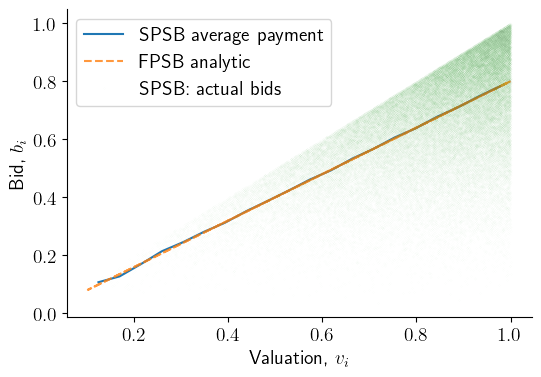

In [4]:
# We intend to compute average payments of different groups of bidders 

binned = stats.binned_statistic(v[-1,:], v[-2,:], statistic='mean', bins=20)
xx = binned.bin_edges
xx = [(xx[ii]+xx[ii+1])/2 for ii in range(len(xx)-1)]
yy = binned.statistic

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xx, yy, label='SPSB average payment')
ax.plot(v[-1,:], b[-1,:], '--', alpha = 0.8, label = 'FPSB analytic')
ax.plot(v[-1,:], v[-2,:], 'o', alpha = 0.05, markersize = 0.1, label = 'SPSB: actual bids')

ax.legend(loc='best')
ax.set_xlabel('Valuation, $v_i$')
ax.set_ylabel('Bid, $b_i$')
sns.despine()

## Revenue Equivalence Theorem

We now compare  FPSB and a SPSB auctions from the point of view of the  revenues that a seller can expect to acquire.



**Expected Revenue FPSB:**

The winner with valuation $y$ pays $\frac{n-1}{n}*y$, where n is the number of bidders.

Above we computed that the  CDF is $F_{n}(y) = y^{n}$ and  the PDF is $f_{n} = ny^{n-1}$. 

Consequently,  expected revenue is

$$
\mathbf{R} = \int_{0}^{1}\frac{n-1}{n}v_{i}\times n v_{i}^{n-1}dv_{i} = \frac{n-1}{n+1}
$$

**Expected Revenue SPSB:**

The expected revenue equals n $\times$ expected payment of a bidder.

Computing this we get

$$
\begin{aligned}
\mathbf{TR} &= n\mathbf{E_{v_i}}\left[\mathbf{E_{y_i}}[y_{i}|y_{i} < v_{i}]\mathbf{P}(y_{i} < v_{i}) + 0\times\mathbf{P}(y_{i} > v_{i})\right] \\
&= n\mathbf{E_{v_i}}\left[\mathbf{E_{y_i}}[y_{i}|y_{i} < v_{i}]\tilde{F}_{n-1}(v_{i})\right] \\
&= n\mathbf{E_{v_i}}[\frac{n-1}{n} \times v_{i} \times v_{i}^{n-1}] \\
&= (n-1)\mathbf{E_{v_i}}[v_{i}^{n}] \\
&= \frac{n-1}{n+1}
\end{aligned}
$$

Thus, while probability distributions of winning bids typically differ across the two types of auction, we deduce that  expected payments are identical in FPSB and SPSB.

The average payment of FPSB: 0.6665. Std.: 0.1129. Median: 0.6967
The average payment of SPSB: 0.6667. Std.: 0.1782. Median: 0.6862


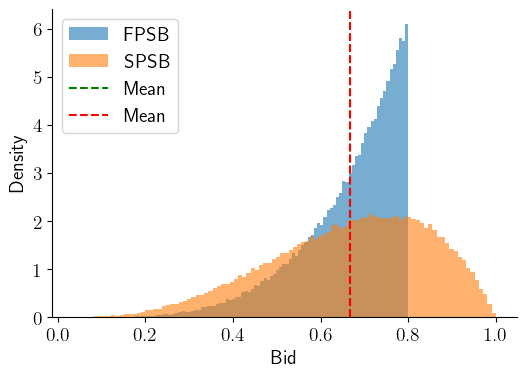

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))

for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
    print('The average payment of %s: %.4f. Std.: %.4f. Median: %.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
    ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='Mean')
ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='Mean')    

ax.legend(loc='best')
ax.set_xlabel('Bid')
ax.set_ylabel('Density')
sns.despine()

**<center>Summary of FPSB and SPSB results with uniform distribution on $[0,1]$</center>**

|    Auction: Sealed-Bid    |             First-Price              |              Second-Price               |
| :-----------------------: | :----------------------------------: | :-------------------------------------: |
|          Winner           |        Agent with highest bid        |         Agent with highest bid          |
|        Winner pays        |             Winner's bid             |           Second-highest bid            |
|        Loser pays         |                  0                   |                    0                    |
|     Dominant strategy     |         No dominant strategy         | Bidding truthfully is dominant strategy |
| Bayesian Nash equilibrium | Bidder $i$ bids $\frac{n-1}{n}v_{i}$ |   Bidder $i$ truthfully bids $v_{i}$    |
|   Auctioneer's revenue    |          $\frac {n-1}{n+1}$          |           $\frac {n-1}{n+1}$            |

**Detour: Computing a Bayesian Nash Equibrium for  FPSB**

The Revenue Equivalence Theorem lets us an optimal bidding strategy for  a  FPSB auction  from outcomes of a SPSB auction.

Let  $b(v_{i})$ be the optimal bid in a FPSB auction. 

The revenue equivalence  theorem tells us that a bidder agent with value $v_{i}$ on average receives the same  **payment** in the two  types of auction.

Consequently, 

$$
b(v_{i})\mathbf{P}(y_{i} < v_{i}) + 0 * \mathbf{P}(y_{i} \ge v_{i}) = \mathbf{E}_{y_{i}}[y_{i} | y_{i} < v_{i}]\mathbf{P}(y_{i} < v_{i}) + 0 * \mathbf{P}(y_{i} \ge v_{i})
$$

It follows that an optimal bidding strategy in a FPSB auction is $b(v_{i}) = \mathbf{E}_{y_{i}}[y_{i} | y_{i} < v_{i}]$.

##  Calculation of  Bid Price in FPSB

In equations {eq}`eq:optbid1` and {eq}`eq:optbid1`, we displayed formulas for
optimal bids in a symmetric Bayesian Nash Equilibrium of a FPSB auction.

$$
\mathbf{E}[y_{i} | y_{i} < v_{i}]
$$ 

where 
- $v_{i} = $  value of bidder $i$
- $y_{i} = $: maximum value of all bidders except $i$, i.e., $y_{i} = \max_{j \neq i} v_{j}$


Above, we computed an optimal  bid price in a FPSB auction analytically for a case in which private values are uniformly distributed. 


For most probability distributions of private values, analytical solutions aren't  easy to compute.

Instead, we can  compute  bid prices in FPSB auctions numerically as functions of the distribution of private values.

In [6]:
def evaluate_largest(v_hat, array, order=1):
    """
    A method to estimate the largest (or certain-order largest) value of the other biders,
    conditional on player 1 wins the auction. 

    Parameters:
    ----------
    v_hat : float, the value of player 1. The biggest value in the auction that player 1 wins.

    array: 2 dimensional array of bidders' values in shape of (N,R), 
           where N: number of players, R: number of auctions

    order: int. The order of largest number among bidders who lose.
                e.g. the order for largest number beside winner is 1. 
                     the order for second-largest number beside winner is 2. 

    """
    N,R = array.shape
    array_residual=array[1:,:].copy()  # drop the first row because we assume first row is the winner's bid
    
    index=(array_residual<v_hat).all(axis=0)
    array_conditional=array_residual[:,index].copy()
    
    array_conditional=np.sort(array_conditional, axis=0)
    return array_conditional[-order,:].mean()

We can check the accuracy of our `evaluate_largest` method by comparing it with an analytical solution.

We find that despite small discrepancy, the evaluate_largest method functions well. 

Furthermore, if we take a very large number of auctions, say 1 million, the discrepancy disappears.

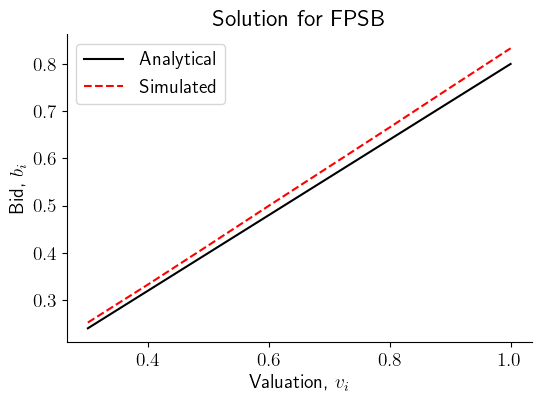

In [7]:
v_grid = np.linspace(0.3,1,8)
bid_analytical = b_star(v_grid,N)
bid_simulated = [evaluate_largest(ii, v) for ii in v_grid]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(v_grid, bid_analytical, '-', color='k', label='Analytical')
ax.plot(v_grid, bid_simulated, '--', color='r', label='Simulated')

ax.legend(loc='best')
ax.set_xlabel('Valuation, $v_i$')
ax.set_ylabel('Bid, $b_i$')
ax.set_title('Solution for FPSB')
sns.despine()

##  $\chi^2$ Distribution

Let's try an example in which the distribution of private values is a $\chi^2$ distribution.  

We'll start by taking a look at a $\chi^2$ distribution with the help of the following Python code:

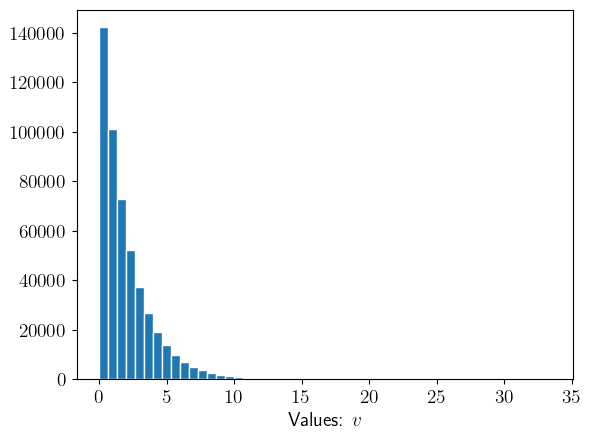

In [8]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N*R,))

plt.hist(v, bins=50, edgecolor='w')
plt.xlabel('Values: $v$')
plt.show()

Now we'll get Python to construct a bid price function

In [9]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N,R))


# we compute the quantile of v as our grid
pct_quantile = np.linspace(0, 100, 101)[1:-1]
v_grid = np.percentile(v.flatten(), q=pct_quantile)

EV=[evaluate_largest(ii, v) for ii in v_grid]  
# nan values are returned for some low quantiles due to lack of observations 

/tmp/ipykernel_17725/1297414400.py:25: RuntimeWarning: Mean of empty slice.
  return array_conditional[-order,:].mean()
/__w/lecture-python.myst/lecture-python.myst/3/envs/quantecon/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
# we insert 0 into our grid and bid price function as a complement
EV=np.insert(EV,0,0)
v_grid=np.insert(v_grid,0,0)

b_star_num = interp.interp1d(v_grid, EV, fill_value="extrapolate")

We check our bid price function by computing and visualizing the result.

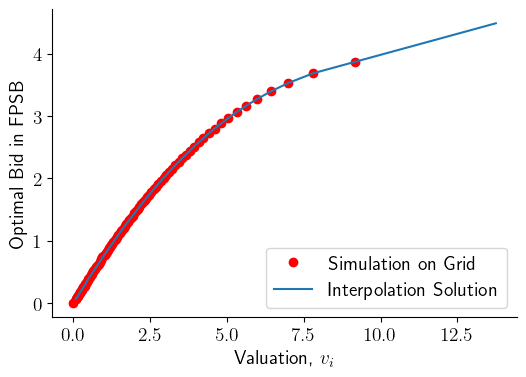

In [11]:
pct_quantile_fine = np.linspace(0, 100, 1001)[1:-1]
v_grid_fine = np.percentile(v.flatten(), q=pct_quantile_fine)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(v_grid, EV, 'or', label='Simulation on Grid')
ax.plot(v_grid_fine, b_star_num(v_grid_fine) , '-', label='Interpolation Solution')

ax.legend(loc='best')
ax.set_xlabel('Valuation, $v_i$')
ax.set_ylabel('Optimal Bid in FPSB')
sns.despine()

Now we can use Python to compute the probability distribution of the price paid by the winning bidder

In [12]:
b=b_star_num(v)

idx = np.argsort(v, axis=0)
v = np.take_along_axis(v, idx, axis=0)  # same as np.sort(v, axis=0), except now we retain the idx
b = np.take_along_axis(b, idx, axis=0)

ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)
ii = np.take_along_axis(ii, idx, axis=0)

winning_player = ii[-1,:]

winner_pays_fpsb = b[-1,:]  # highest bid
winner_pays_spsb = v[-2,:]  # 2nd-highest valuation

The average payment of FPSB: 2.5693. Std.: 0.8383. Median: 2.5829
The average payment of SPSB: 2.5661. Std.: 1.3580. Median: 2.3180


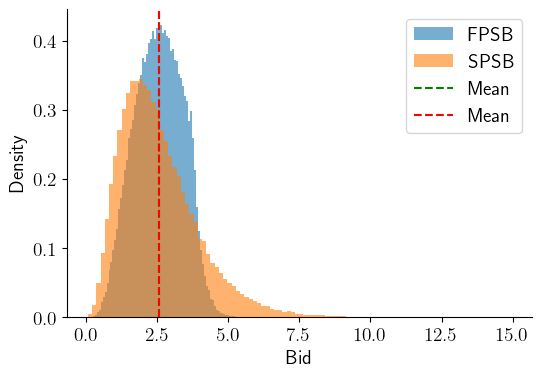

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
    print('The average payment of %s: %.4f. Std.: %.4f. Median: %.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
    ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='Mean')
ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='Mean')

ax.legend(loc='best')
ax.set_xlabel('Bid')
ax.set_ylabel('Density')
sns.despine()

## 5 Code Summary

We assemble the functions that we have used into a Python  class

In [14]:
class bid_price_solution:
    
    def __init__(self, array):
        """
        A class that can plot the value distribution of bidders, 
        compute the optimal bid price for bidders in FPSB
        and plot the distribution of winner's payment in both FPSB and SPSB

        Parameters:
        ----------

        array: 2 dimensional array of bidders' values in shape of (N,R), 
               where N: number of players, R: number of auctions

        """
        self.value_mat=array.copy()
        
        return None
    
    def plot_value_distribution(self):
        plt.hist(self.value_mat.flatten(), bins=50, edgecolor='w')
        plt.xlabel('Values: $v$')
        plt.show()
        
        return None
    
    def evaluate_largest(self, v_hat, order=1):
        N,R = self.value_mat.shape
        array_residual = self.value_mat[1:,:].copy()  
        # drop the first row because we assume first row is the winner's bid

        index=(array_residual<v_hat).all(axis=0)
        array_conditional=array_residual[:,index].copy()

        array_conditional=np.sort(array_conditional, axis=0)
        
        return array_conditional[-order,:].mean()
    
    def compute_optimal_bid_FPSB(self):
        # we compute the quantile of v as our grid
        pct_quantile = np.linspace(0, 100, 101)[1:-1]
        v_grid = np.percentile(self.value_mat.flatten(), q=pct_quantile)

        EV=[self.evaluate_largest(ii) for ii in v_grid]  
        # nan values are returned for some low quantiles due to lack of observations 
        
        # we insert 0 into our grid and bid price function as a complement
        EV=np.insert(EV,0,0)
        v_grid=np.insert(v_grid,0,0)

        self.b_star_num = interp.interp1d(v_grid, EV, fill_value="extrapolate")
        
        pct_quantile_fine = np.linspace(0, 100, 1001)[1:-1]
        v_grid_fine = np.percentile(self.value_mat.flatten(), q=pct_quantile_fine)

        fig, ax = plt.subplots(figsize=(6, 4))

        ax.plot(v_grid, EV, 'or', label='Simulation on Grid')
        ax.plot(v_grid_fine, self.b_star_num(v_grid_fine) , '-', label='Interpolation Solution')

        ax.legend(loc='best')
        ax.set_xlabel('Valuation, $v_i$')
        ax.set_ylabel('Optimal Bid in FPSB')
        sns.despine()
        
        return None
    
    def plot_winner_payment_distribution(self):
        self.b = self.b_star_num(self.value_mat)
        
        idx = np.argsort(self.value_mat, axis=0)
        self.v = np.take_along_axis(self.value_mat, idx, axis=0)  # same as np.sort(v, axis=0), except now we retain the idx
        self.b = np.take_along_axis(self.b, idx, axis=0)

        self.ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)
        self.ii = np.take_along_axis(self.ii, idx, axis=0)

        winning_player = self.ii[-1,:]

        winner_pays_fpsb = self.b[-1,:]  # highest bid
        winner_pays_spsb = self.v[-2,:]  # 2nd-highest valuation
        
        fig, ax = plt.subplots(figsize=(6, 4))

        for payment,label in zip([winner_pays_fpsb, winner_pays_spsb], ['FPSB', 'SPSB']):
            print('The average payment of %s: %.4f. Std.: %.4f. Median: %.4f'% (label,payment.mean(),payment.std(),np.median(payment)))
            ax.hist(payment, density=True, alpha=0.6, label=label, bins=100)

        ax.axvline(winner_pays_fpsb.mean(), ls='--', c='g', label='Mean')
        ax.axvline(winner_pays_spsb.mean(), ls='--', c='r', label='Mean')

        ax.legend(loc='best')
        ax.set_xlabel('Bid')
        ax.set_ylabel('Density')
        sns.despine()
        
        return None

In [15]:
np.random.seed(1337)
v = np.random.chisquare(df=2, size=(N,R))

chi_squ_case = bid_price_solution(v)

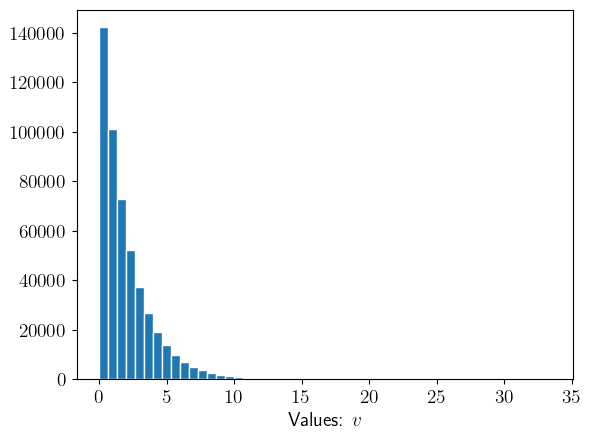

In [16]:
chi_squ_case.plot_value_distribution()

/tmp/ipykernel_17725/2108492276.py:37: RuntimeWarning: Mean of empty slice.
  return array_conditional[-order,:].mean()
/__w/lecture-python.myst/lecture-python.myst/3/envs/quantecon/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


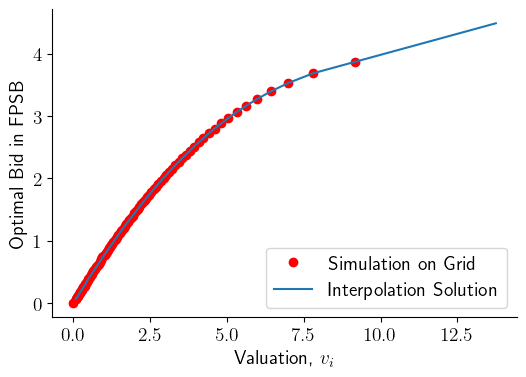

In [17]:
chi_squ_case.compute_optimal_bid_FPSB()

The average payment of FPSB: 2.5693. Std.: 0.8383. Median: 2.5829
The average payment of SPSB: 2.5661. Std.: 1.3580. Median: 2.3180


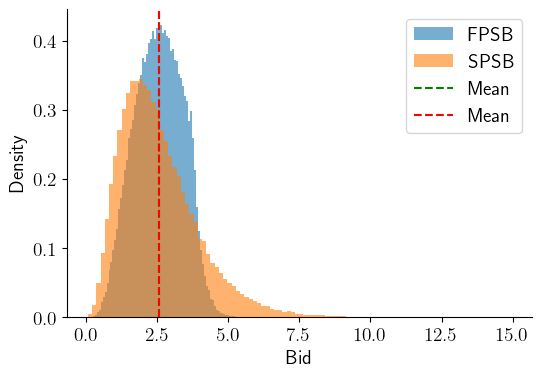

In [18]:
chi_squ_case.plot_winner_payment_distribution()

## References

1. Wikipedia for FPSB: https://en.wikipedia.org/wiki/First-price_sealed-bid_auction
2. Wikipedia for SPSB: https://en.wikipedia.org/wiki/Vickrey_auction
3. Chandra Chekuri's lecture note for algorithmic game theory: http://chekuri.cs.illinois.edu/teaching/spring2008/Lectures/scribed/Notes20.pdf
4. Tim Salmon. ECO 4400 Supplemental Handout: All About Auctions: https://s2.smu.edu/tsalmon/auctions.pdf
5. Auction Theory- Revenue Equivalence Theorem: https://michaellevet.wordpress.com/2015/07/06/auction-theory-revenue-equivalence-theorem/
6. Order Statistics: https://online.stat.psu.edu/stat415/book/export/html/834